# Exploratory Data Analysis of AirBnB Listings in London, England

## 0. Initial setup
### Run this section first to ensure the correct functionality of the rest of the script.

First, import the required libraries and set the maximum display of data tables

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

from matplotlib.ticker import PercentFormatter

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)


Then, import the corresponding datasets

In [6]:
lsts_url = "./data/listings.csv.gz"
revs_url = "./data/reviews.csv.gz"

lsts_df = pd.read_csv(lsts_url)
revs_df = pd.read_csv(revs_url)

## 1. Univariate Analysis
#### This section will show relevant information regarding single variables of the dataset, which will help in choosing the most relevant to the final conclusions and understanding their behavior.

### 1.1 Neighbourhoods
To begin with, we list each of the unique neighbourhoods in the database

In [7]:
nh_lst = lsts_df["neighbourhood_cleansed"].unique()
print(nh_lst)

['Westminster' 'Hammersmith and Fulham' 'Islington'
 'Kensington and Chelsea' 'Hackney' 'Lambeth' 'Barking and Dagenham'
 'Southwark' 'Wandsworth' 'Barnet' 'Camden' 'Hillingdon' 'Tower Hamlets'
 'Richmond upon Thames' 'Haringey' 'Greenwich' 'Merton' 'Brent' 'Newham'
 'Hounslow' 'Croydon' 'Waltham Forest' 'Lewisham' 'Enfield'
 'City of London' 'Ealing' 'Bromley' 'Havering' 'Harrow'
 'Kingston upon Thames' 'Redbridge' 'Bexley' 'Sutton']


Then, we organize the neighbourhoods by number of listings available in each one. This will help in performing a Pareto analysis to select the neighbourhoods that represent approximately 80% of listings:

<class 'pandas.core.series.Series'>


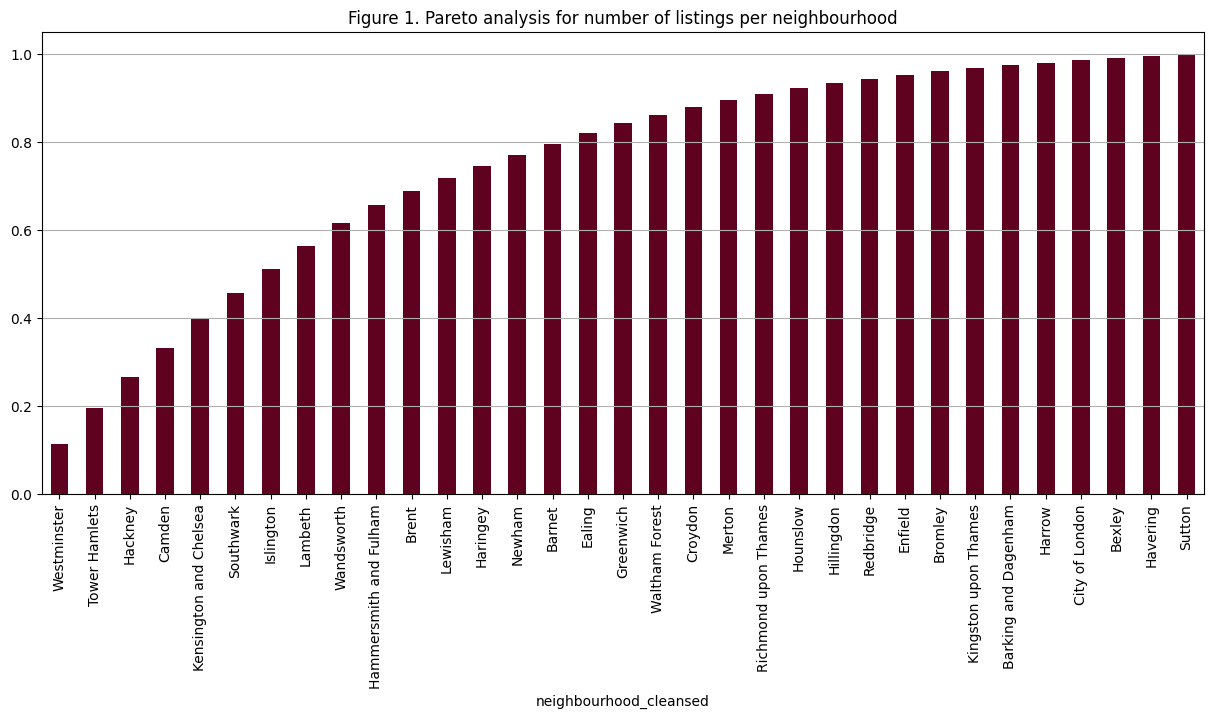

['Westminster', 'Tower Hamlets', 'Hackney', 'Camden', 'Kensington and Chelsea', 'Southwark', 'Islington', 'Lambeth', 'Wandsworth', 'Hammersmith and Fulham', 'Brent', 'Lewisham', 'Haringey', 'Newham', 'Barnet']


In [8]:
nh_ct = []                                                                                  #Vector for count of listings in each neighbourhood

nh_cfreq = lsts_df["neighbourhood_cleansed"].value_counts(normalize=True).cumsum()
print(type(nh_cfreq))

plt.figure(figsize=(15,6))
#plt.bar(lsts_df["neighbourhood_cleansed"].unique(),lsts_df["neighbourhood_cleansed"].value_counts(), color='#5f021f')
nh_cfreq.plot(kind='bar',color='#5f021f')
plt.xticks(rotation=90)

plt.title("Figure 1. Pareto analysis for number of listings per neighbourhood")
plt.grid(axis='y')
plt.show()

nh_rep = nh_cfreq.loc[nh_cfreq < 0.8].index.tolist()                                #Define a vector with the most relevant neighbourhood for future use
nh_nrep = nh_cfreq.loc[nh_cfreq >= 0.8].index.tolist()

print(nh_rep)

Lastly, we will map the most representative neighbourhoods by their coordinates. 

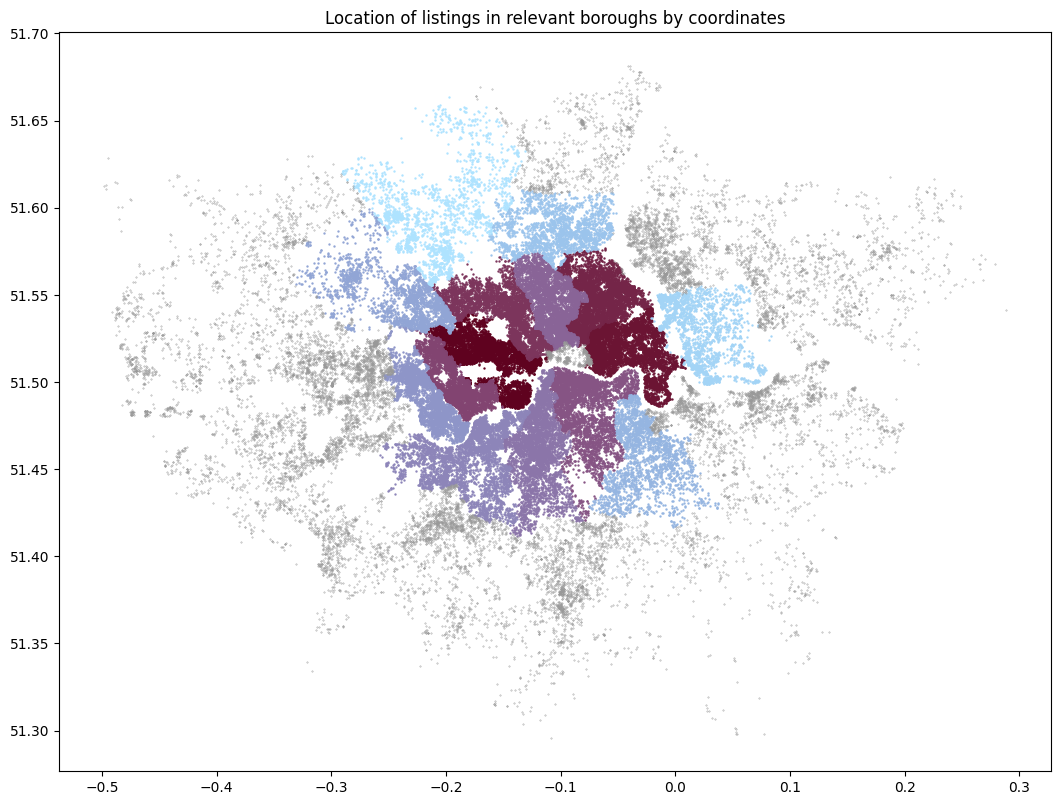

In [9]:
x_mtx_r = []                                                                                            #Vector for longitude coordinates for listings in each relevant neighbourhood
x_mtx_nr = []                                                                                           #Vector for longitude coordinates for listings in each non-relevant neighbourhood
y_mtx_r = []                                                                                            #Vector for latitude coordinates for listings in each relevant neighbourhood
y_mtx_nr = []                                                                                           #Vector for latitude coordinates for listings in each non-relevant neighbourhood
c_r = ['#5f021f','#6b1433','#742548','#7c355c','#824471','#865484','#896497','#8b75a9','#8d85b9',\
    '#8e95c8','#91a5d5','#95b5e1','#9bc4ec','#a3d4f6','#aee3ff']

for r in nh_rep:
    x_mtx_r.append(lsts_df.loc[lsts_df['neighbourhood_cleansed'] == r]['longitude'])
    y_mtx_r.append(lsts_df.loc[lsts_df['neighbourhood_cleansed'] == r]['latitude'])

for nr in nh_nrep:
    x_mtx_nr.append(lsts_df.loc[lsts_df['neighbourhood_cleansed'] == nr]['longitude'])
    y_mtx_nr.append(lsts_df.loc[lsts_df['neighbourhood_cleansed'] == nr]['latitude'])

fig = plt.figure()
w,h = fig.get_size_inches()
fig.set_size_inches(w*2,h*2)
plt.title("Location of listings in relevant boroughs by coordinates")

for i in range(len(x_mtx_r)):
    plt.scatter(x_mtx_r[i],y_mtx_r[i],s=0.5,color=c_r[i])

for j in range(len(x_mtx_nr)):
    plt.scatter(x_mtx_nr[j],y_mtx_nr[j],s=0.1,color='#999999')

plt.show()

Note how the numbers are greater (darker colour) in the most central neighbourhoods in the city. The listings in neighbourhoods that are considered "not relevant" are coloured in grey.

### 1.2 Prices
For the prices, we begin by representing the listings in a fixed number of bins. To do this, we start by converting the price data into operable numbers

In [10]:
lsts_df["price_conv"] = lsts_df["price"].str.replace('[$,]','',regex=True).astype(float)

Then, we define the number of bins and plot the frequency of listings that correspond to each bin. To avoid visualization errors, we first eliminate outliers by ignoring prices that outside of 1.5 times the interquartile range (the range between the 25th and 75th percentile)

[]

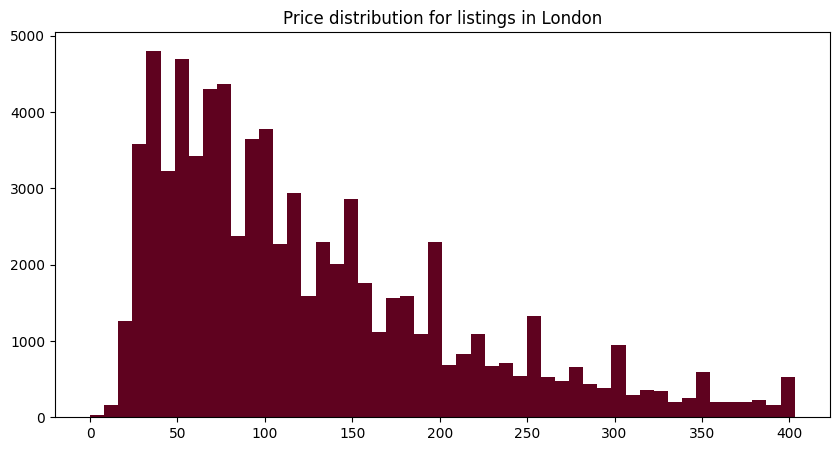

In [11]:
q1 = lsts_df["price_conv"].quantile(0.25)
q3 = lsts_df["price_conv"].quantile(0.75)
iqr = q3-q1

plt.figure(figsize=(10,5))
plt.hist(lsts_df.loc[lsts_df["price_conv"] <= (q3 + 1.5*iqr)]["price_conv"],bins=50,color='#5f021f')
plt.title("Price distribution for listings in London")
plt.plot()

Here, we see that the distribution is skewed towards values between $50 and $100 per night, which can be used as a reference for the potential pricing of a future listing.

We can also find relevant data for the prices (ignoring the outliers removed in the previous step) by looking at a box plot. 
- The vertical yellow line represents the median value. 
- The green triangle represents the mean.
- The vertical edges of the box correspond to the 25th percentile and 75th percentile, respectively.

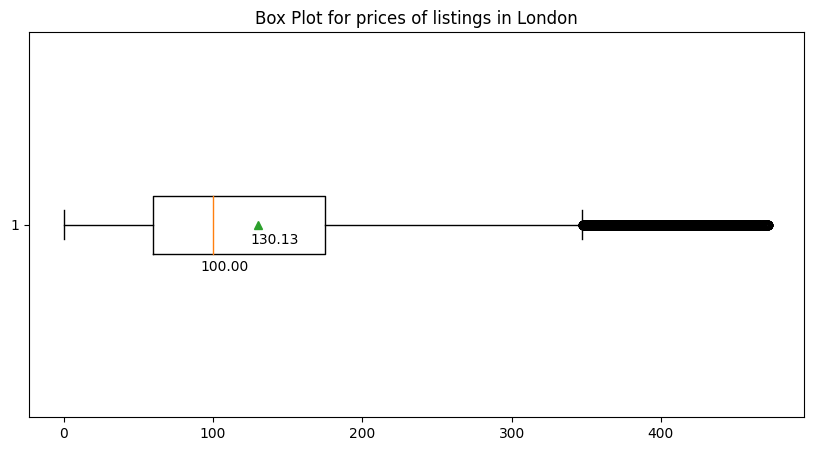

In [12]:
plt.figure(figsize=(10,5))
plt.boxplot(lsts_df.loc[lsts_df["price_conv"] <= (q3 + 2*iqr)]["price_conv"], showmeans=True, vert=False)

text_m = lsts_df.loc[lsts_df["price_conv"] <= (q3 + 2*iqr)]["price_conv"].mean()
text_md = lsts_df.loc[lsts_df["price_conv"] <= (q3 + 2*iqr)]["price_conv"].median()
text_m = '{:.2f}'.format(text_m)
text_md = '{:.2f}'.format(text_md)

plt.annotate(text_m,xy=(250,207),xycoords='figure pixels')
plt.annotate(text_md,xy=(200,180),xycoords='figure pixels')
plt.title("Box Plot for prices of listings in London")
plt.show()

Now it is clearer that the median lands exactly at $100, while the average is a bit higher at $130.13. This can provide a reference range to set the prices of new listings.

### 1.3 Property features
Now, we will take a look at how the listings in the city are distributed in terms of their type and size, defined as the maximum number of people that can be accommodated in the property. This will help in discovering any trends in composition of properties, which we can later compare to availability, prices, and bookings, to figure out the most sought-after features.

To get insight on the type of property that is mostly available in London, we display the property types as stacked bars, with colors representing the maximum number of people that can be accommodated per type of listing.

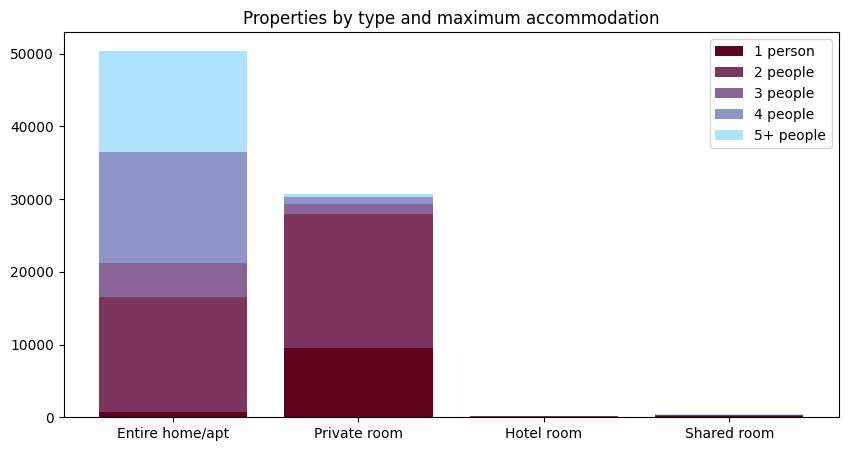

In [13]:
x = lsts_df["room_type"].unique()
y1 = []
y2 = []
y3 = []
y4 = []
y5 = []

for rt in lsts_df["room_type"].unique():
    y1.append(len(lsts_df.loc[(lsts_df["room_type"]==rt) & (lsts_df["accommodates"]==1)]))
    y2.append(len(lsts_df.loc[(lsts_df["room_type"]==rt) & (lsts_df["accommodates"]==2)]))
    y3.append(len(lsts_df.loc[(lsts_df["room_type"]==rt) & (lsts_df["accommodates"]==3)]))
    y4.append(len(lsts_df.loc[(lsts_df["room_type"]==rt) & (lsts_df["accommodates"]==4)]))
    y5.append(len(lsts_df.loc[(lsts_df["room_type"]==rt) & (lsts_df["accommodates"]>=5)]))

plt.figure(figsize=(10,5))
plt.bar(x, y1, color="#5f021f")
plt.bar(x, y2, bottom=np.array(y1), color="#7c355c")
plt.bar(x, y3, bottom=np.array(y1)+np.array(y2), color="#896497")
plt.bar(x, y4, bottom=np.array(y1)+np.array(y2)+np.array(y3), color="#8e95c8")
plt.bar(x, y5, bottom=np.array(y1)+np.array(y2)+np.array(y3)+np.array(y4), color="#aee3ff")
plt.legend(["1 person","2 people","3 people","4 people","5+ people"])
plt.title("Properties by type and maximum accommodation")
plt.show()

### 1.4 Availability (Offer)
To get a sense of the offer of properties in certain areas, we will look at the availability numbers for the next 30, 60, 90 days.

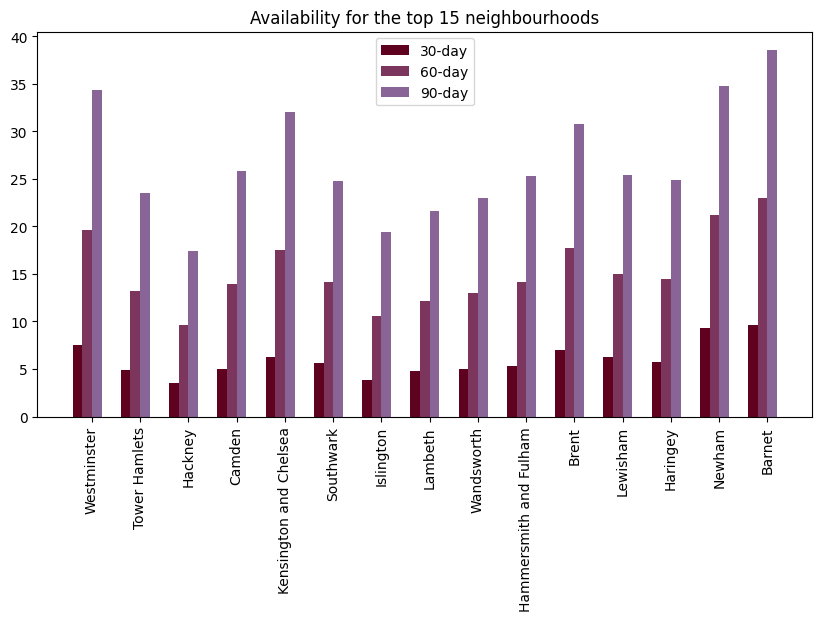

In [14]:
x_axis = np.arange(len(nh_rep))
y_av30d = []
y_av60d = []
y_av90d = []
y_nhrep = []

for n in nh_rep:
    y_av30d.append(lsts_df.loc[lsts_df['neighbourhood_cleansed']==n]['availability_30'].mean())
    y_av60d.append(lsts_df.loc[lsts_df['neighbourhood_cleansed']==n]['availability_60'].mean())
    y_av90d.append(lsts_df.loc[lsts_df['neighbourhood_cleansed']==n]['availability_90'].mean())
    y_nhrep.append(len(lsts_df[lsts_df['neighbourhood_cleansed']==n]))

plt.figure(figsize=(10,5))
plt.xticks(x_axis,nh_rep)
plt.xticks(rotation=90)

plt.bar(x_axis - 0.3,y_av30d,0.2,color='#5f021f',label = '30-day')
plt.bar(x_axis - 0.1,y_av60d,0.2,color='#7c355c', label = '60-day')
plt.bar(x_axis + 0.1,y_av90d,0.2,color='#896497', label = '90-day')
plt.legend()

plt.title("Availability for the top 15 neighbourhoods")
plt.show()

Here, the size of the bar represent the number of available days for properties in the corresponding neighbourhood, sorted by total listings in each neighbourhood. Note how this metric does not follow a linear relation to the total listings. We will explore the relationship and its meaning in a later section.

### 1.5 Number of Reviews - Demand
Here, we will take a quick look at the number of reviews, since they give a general idea of the number of times each property has been reserved. We will sort them by the month in which the review was left, in order to pinpoint any particular season of higher demand.

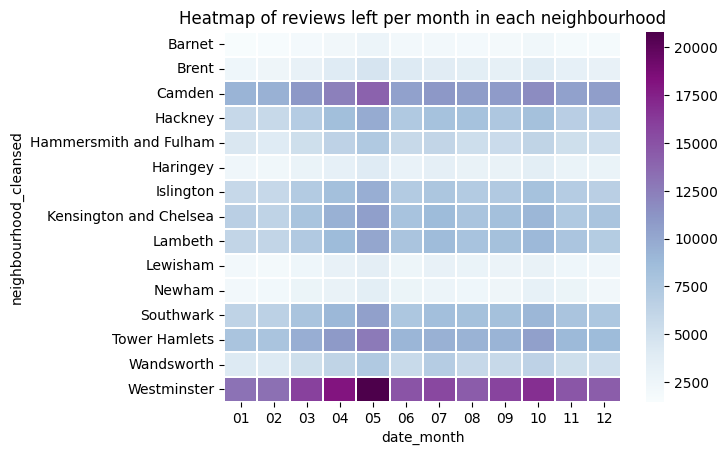

In [15]:
lsts_id = lsts_df.rename(columns={'id':'listing_id'})
lsts_id = lsts_id[['listing_id','neighbourhood_cleansed']]

revs_nh = revs_df.merge(lsts_id,how="left")
revs_nh[['date_year','date_month','date_day']] = revs_nh.date.str.split("-",expand=True)
revs_gb = revs_nh.groupby(['neighbourhood_cleansed','date_month']).size().reset_index().rename(columns={0:'count'})

revs_gbf = revs_gb[revs_gb['neighbourhood_cleansed'].isin(nh_rep)]
revs_hm = revs_gbf.pivot(index='neighbourhood_cleansed',columns='date_month',values='count')

sb.heatmap(revs_hm,cmap='BuPu',linewidth=0.3)
plt.title("Heatmap of reviews left per month in each neighbourhood")
plt.show()

From this heatmap we can see that, accross all neighbourhoods, there are more the months of April, May, and October

### 1.6 Review scores
Now let's look at the review scores for properties in each of the most representative neighbourhoods to get a broad sense of how each zone is perceived by guests.

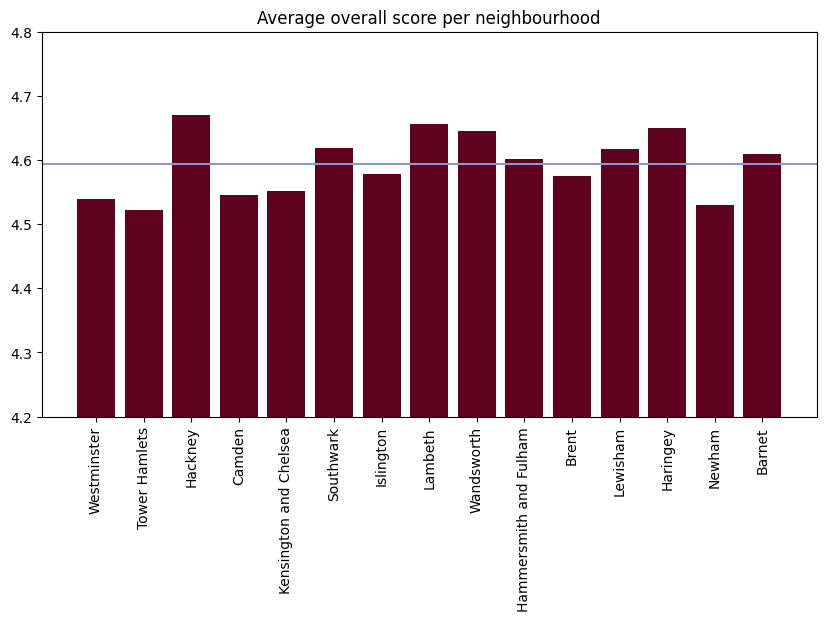

In [16]:
lsts_sr = lsts_df.groupby('neighbourhood_cleansed')['review_scores_rating'].mean()
lsts_srr = lsts_sr.filter(items=nh_rep)

plt.figure(figsize=(10,5))
plt.bar(nh_rep,lsts_srr,color='#5f021f')
plt.ylim(4.2,4.8)
plt.xticks(rotation=90)
plt.axhline(lsts_srr.mean(),color='#8e95c8')
plt.title("Average overall score per neighbourhood")
plt.show()

Here we can see that, despite the average rating of the most representative neighbourhoods is quite high, some of them perform above the average (horizontal line).

### 1.7 Amenity score
we look for the most popular amenities within the listings. Then, we use the list of amenities of each listing to give it a score, based on how many of the 30 top amenities it includes. Then, we show the average "amenity score" for each of the most representative neighbourhoods.

First, we convert the "amenities" list in the original dataset to a friendlier format:

In [17]:
lsts_df['amenities'] = lsts_df['amenities'].str.strip('[]').str.split(", ")

Then, we add the new 'amenity score' to each of the listings:

In [18]:
amt_flt = pd.Series([x for item in lsts_df.amenities for x in item]).value_counts()[0:29]
lsts_df['amenity score'] = 0

for l in range(len(lsts_df)):
    lst_count = 0
    for a in lsts_df['amenities'][l]:
        if a in amt_flt:
            lst_count= lst_count+1
    lsts_df.at[l,'amenity score'] = lst_count

Finally, we plot the average amenity score for each of the top neighbourhoods

neighbourhood_cleansed
Westminster               16.536013
Tower Hamlets             15.568048
Hackney                   14.743651
Camden                    15.671301
Kensington and Chelsea    16.918602
Southwark                 15.655421
Islington                 15.313597
Lambeth                   15.628610
Wandsworth                15.829239
Hammersmith and Fulham    16.365379
Brent                     15.956404
Lewisham                  15.310113
Haringey                  15.065425
Newham                    15.462016
Barnet                    15.310395
Name: amenity score, dtype: float64


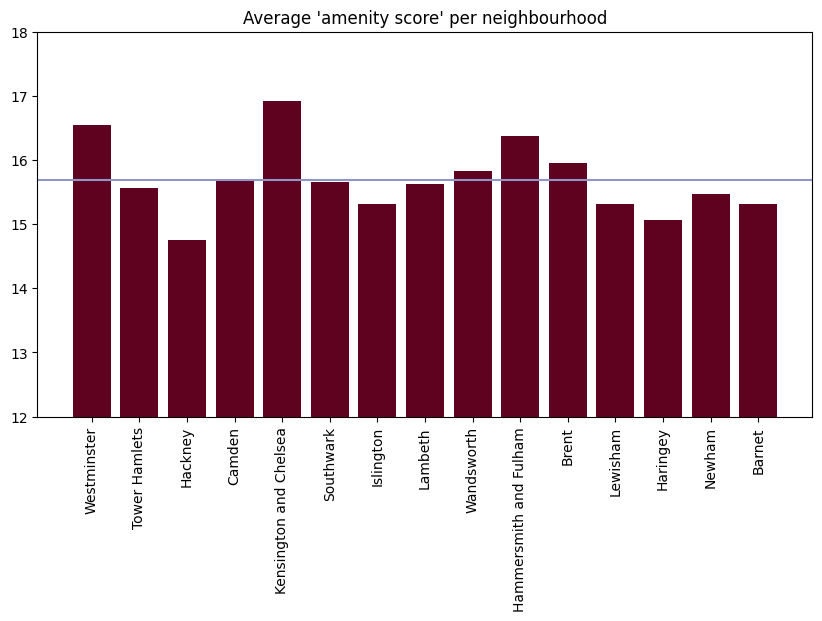

In [33]:
lsts_asc = lsts_df.groupby('neighbourhood_cleansed')['amenity score'].mean()
lsts_asr = lsts_asc.filter(items=nh_rep)

print(lsts_asr)

plt.figure(figsize=(10,5))
plt.bar(nh_rep,lsts_asr,color='#5f021f')
plt.ylim(12,18)
plt.xticks(rotation=90)
plt.axhline(lsts_asr.mean(),color='#8e95c8')
plt.title("Average 'amenity score' per neighbourhood")
plt.show()

This gives us some information regarding which neighbourhoods have listings with better amenities, while also helping in identifying neighbourhoods with properties that can be improved with small investments in amenities.

## 2. Multivariate Analysis
#### This section will focus in displaying information obtained from analyzing the influence of certain variables over others, determining or debunking potential relationships between them, and drawing conclusions from these analyses.

### 2.1 Scores by category
First, we display a heatmap that shows the level of correlation between the different categories that guests are allowed to rate at the end of their stay.

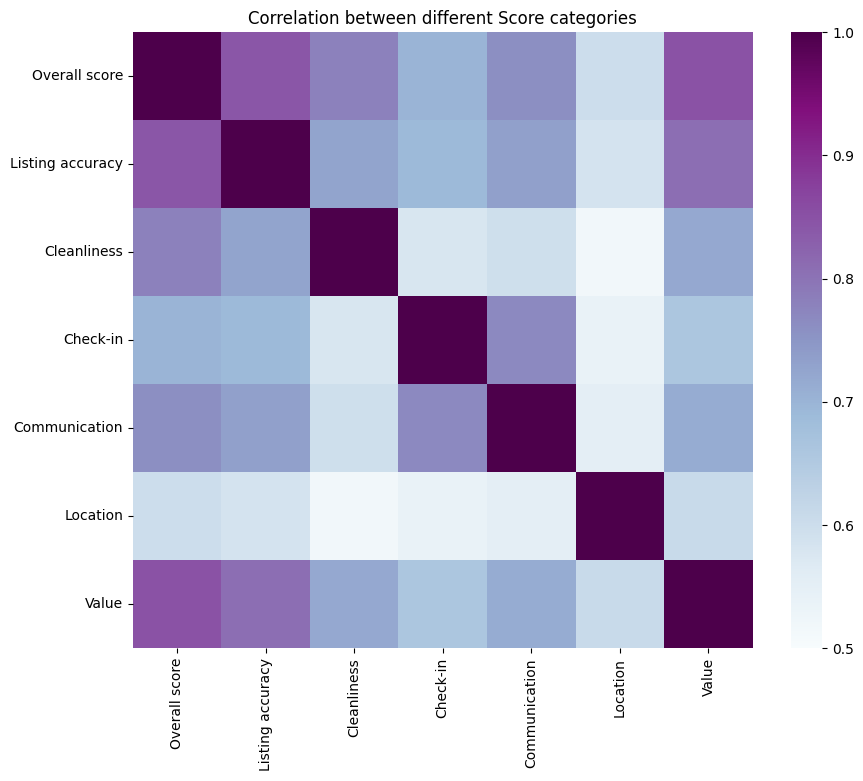

In [20]:
lsts_srn = lsts_df.rename(columns={"review_scores_rating":"Overall score","review_scores_accuracy":"Listing accuracy", \
                                   "review_scores_cleanliness":"Cleanliness","review_scores_checkin":"Check-in","review_scores_communication":"Communication", \
                                    "review_scores_location":"Location","review_scores_value":"Value"})

plt.figure(figsize=(10, 8))
sb.heatmap(lsts_srn[["Overall score", "Listing accuracy", "Cleanliness", "Check-in", "Communication", "Location", "Value"]].corr(), vmin=0.5, vmax=1, cmap="BuPu")
plt.title("Correlation between different Score categories")
plt.show()

The darker the color, the higher the correlation between the scores. Besides the diagonal (see note below), the score categories with the highest correlation to the overall scores are the Value, defined as how much does the guest believes the listing was worth the price they paid, and the accuracy of the listing's description and pictures.

**NOTE: The diagonal is the darkest color, since it represents the correlation of a variable with itself, and this will always be equal to 1.**

## <u>Conclusion #1: Clients will react better to accurate listings that make them feel their money was well spent, either by charging lesser fees or providing better listings.</u>

### 2.2 Price correlations
Now, let's take a look at possible variables that may be correlated to the price of listings in the most relevant neighbourhoods.

- Number of listings per neighbourhood
- Average 30-, 60-, and 90-day availability per neighbourhood
- Amenity score per neighbourhood

In [36]:
prc_corr = pd.DataFrame(nh_rep,columns=["Boroughs"])
prc_corr['# of listings'] = 0
prc_corr['30-day availability'] = 0
prc_corr['60-day availability'] = 0
prc_corr['90-day availability'] = 0
prc_corr['Avg. amenity score'] = 0
prc_corr['Avg. price'] = 0

for l in prc_corr['Boroughs']:
    prc_corr.loc[prc_corr['Boroughs'] == l,'Avg. price'] = lsts_df.loc[lsts_df['neighbourhood_cleansed']==l,'price_conv'].mean()
    prc_corr.loc[prc_corr['Boroughs'] == l,'# of listings'] = len(lsts_df[lsts_df['neighbourhood_cleansed']==l])
    prc_corr.loc[prc_corr['Boroughs'] == l,'30-day availability'] = lsts_df.loc[lsts_df['neighbourhood_cleansed']==l,'availability_30'].mean()
    prc_corr.loc[prc_corr['Boroughs'] == l,'60-day availability'] = lsts_df.loc[lsts_df['neighbourhood_cleansed']==l,'availability_60'].mean()
    prc_corr.loc[prc_corr['Boroughs'] == l,'90-day availability'] = lsts_df.loc[lsts_df['neighbourhood_cleansed']==l,'availability_90'].mean()
    prc_corr.loc[prc_corr['Boroughs'] == l,'Avg. amenity score'] = lsts_asr[l]

,Boroughs,# of listings,30-day availability,60-day availability,90-day availability,Avg. amenity score,Avg. price
0,Westminster,9330,7.519400,19.569025,34.379528,16.536013,338.345981
1,Tower Hamlets,6635,4.942728,13.225170,23.515901,15.568048,132.925546
2,Hackney,5828,3.573782,9.662148,17.444578,14.743651,128.905285
3,Camden,5394,5.000742,13.955877,25.836856,15.671301,212.275677
4,Kensington and Chelsea,5381,6.263706,17.483925,32.063743,16.918602,327.189184
5,Southwark,4713,5.607681,14.143009,24.773393,15.655421,192.139402
6,Islington,4442,3.876407,10.524313,19.361999,15.313597,166.056506
7,Lambeth,4432,4.745036,12.100181,21.582356,15.628610,146.670578
8,Wandsworth,4111,4.970080,12.972026,22.962053,15.829239,176.537339
9,Hammersmith and Fulham,3495,5.299285,14.177110,25.351359,16.365379,184.652361


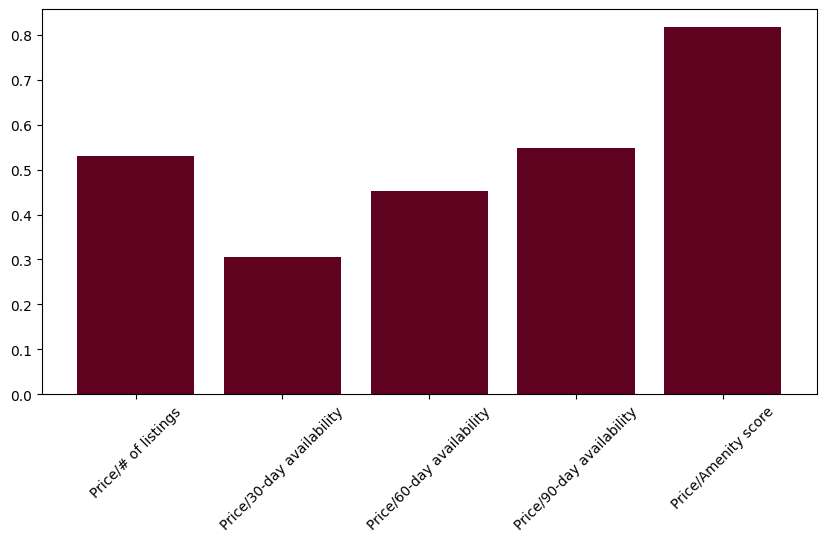

In [41]:
prc_lst_corr = prc_corr['Avg. price'].corr(prc_corr['# of listings'])
prc_30d_corr = prc_corr['Avg. price'].corr(prc_corr['30-day availability'])
prc_60d_corr = prc_corr['Avg. price'].corr(prc_corr['60-day availability'])
prc_90d_corr = prc_corr['Avg. price'].corr(prc_corr['90-day availability'])
prc_ams_corr = prc_corr['Avg. price'].corr(prc_corr['Avg. amenity score'])

x_values = ['Price/# of listings','Price/30-day availability','Price/60-day availability','Price/90-day availability','Price/Amenity score']
y_values = [prc_lst_corr,prc_30d_corr,prc_60d_corr,prc_90d_corr,prc_ams_corr]

plt.figure(figsize=(10,5))
plt.bar(x_values,y_values,color='#5f021f')
plt.xticks(rotation=45)
plt.show()

Out of these metrics, it is clear that the calculated amenity score has the strongest correlation to the average price of listings in each neighbourhood. This means that a small investment in providing better amenities in a property is likely to justify an increase in price, which can bring in more profit.

## <u>Conclusion #2: There is a correlation between listing price and the available amenities. Investing in amenities is likely to justify an increase in listing price.</u>

### 2.3 Average earnings per neighbourhood + potential earnings per availability

Lastly, we will calculate an approximate of the average earnings for each of the most relevant neighbourhoods using the number of reviews submitted during the last compelte year (2022) as a proxy for the number of times the listings of each neighbourhood were booked in the same timeframe.

With this proxy, we will calculate the average earnings for each borough.

*(number of reviews in 2022 for each borough / total listings in each borough) * average price of listings in each borough*

In [44]:
revs_nh

,listing_id,id,date,reviewer_id,reviewer_name,comments,neighbourhood_cleansed,date_year,date_month,date_day
0,306333,121679704,2016-12-18,8698767,Ben,"Great find, and great value! <br/>Right in th...",Hackney,2016,12,18
1,154221,59561487,2016-01-12,1655084,Daria,Small and cosy flat with all goods you need in...,Westminster,2016,01,12
2,306333,122121197,2016-12-21,72253091,Matthew,A quiet house in the Hoxton area. Felt very ho...,Hackney,2016,12,21
3,306333,123425430,2016-12-29,18523201,Kom,"We had a great stay in London, and Rob's flat ...",Hackney,2016,12,29
4,306333,126479992,2017-01-12,9940848,Marisa,This flat is perfect if you are interested in ...,Hackney,2017,01,12
...,...,...,...,...,...,...,...,...,...,...
1467491,906274034704309720,910021097655888505,2023-06-09,60496284,Eleanor,Leo and Angelo were really helpful and accommo...,Westminster,2023,06,09
1467492,906386402157429246,909280354505800488,2023-06-08,457340950,Joel,This location was absolutely incredible! Super...,Croydon,2023,06,08
1467493,907934563457450996,909344683541862336,2023-06-08,25385095,Natalia,Beautiful well equipped apartment. Everything ...,Lambeth,2023,06,08
1467494,908542655053258945,909346828264857408,2023-06-08,41846603,Danila,"My stay was excellent, the apartment and the r...",Westminster,2023,06,08
